In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import numpy as np

In [2]:
background_color = '#004D98'
line_color='#d2dde1'
marker_color = '#dcdf4c'
figsize = (9,16)
width, height = figsize
aspect = width/height

In [3]:
pitch = Pitch(pitch_color=background_color,line_color=line_color,orientation='vertical',pitch_type='opta',
              view='half')
# going to use this to plot a legend - cheap hack that lines are same color as the background so
# the lines won't show up
empty_pitch = Pitch(pitch_color=background_color,line_color=background_color,
                    orientation='vertical',pitch_type='opta',view='full')

In [4]:
IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/en/8/8b/Crawley_Town_FC_logo.png'
crawley_logo = np.array(Image.open(urlopen(IMAGE_URL)))

In [5]:
# for this image the aspect is different so you have to calculate the logo height from its width
# so that you can get the height and width of the logo axis right
def calculate_display_height(img,img_display_width,aspect):
    img_height, img_width, _ = img.shape
    img_aspect = img_width/img_height
    img_display_height = img_display_width/img_aspect*aspect
    return img_display_height

# Note that the logo is slightly transparent (alpha = 0.9) I like this better, but you can delete

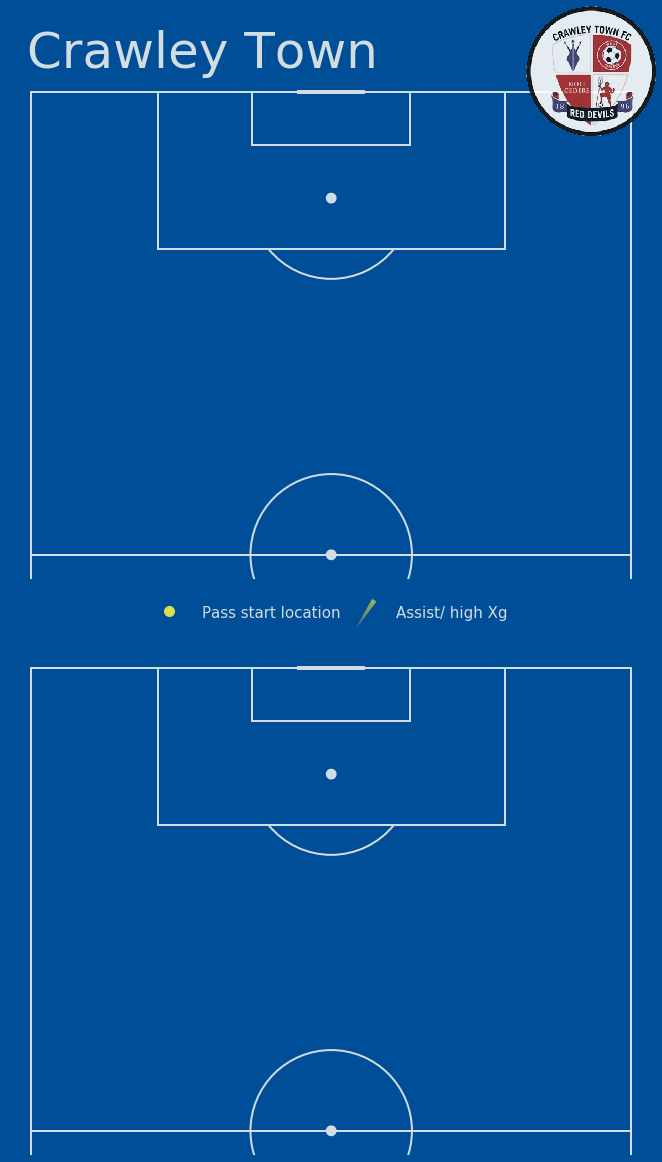

In [6]:
# setup a figure
fig = plt.figure(figsize=figsize,facecolor=background_color);
# The dimensions [left, bottom, width, height] of the new axes.
# All quantities are in fractions of figure width and height.
pitch_top_rect = (0,0.5,1,0.45)
ax_pitch_top = fig.add_axes(pitch_top_rect)
legend1_rect = (0.2,0.45,0.1,0.05)
ax_legend1 = fig.add_axes(legend1_rect)
ax_legend1.axis('off')
legend2_rect = (0.5,0.45,0.1,0.05) #dimensions for line legend
ax_legend2 = fig.add_axes(legend2_rect) # ax for legend2
pitch_bottom_rect = (0,0,1,0.45)
ax_pitch_bottom = fig.add_axes(pitch_bottom_rect)
title_rect = (0.02,0.95,0.7,0.05)
ax_title= fig.add_axes(title_rect)
ax_title.axis('off')
logo_display_width = 0.2
logo_display_height = calculate_display_height(crawley_logo,logo_display_width,aspect)
logo_rect = (1-logo_display_width,1-logo_display_height,logo_display_width,logo_display_height)
ax_logo = fig.add_axes(logo_rect)
ax_logo.axis('off')
ax_logo.imshow(crawley_logo,alpha=0.9)
# draw pitches
pitch.draw(ax=ax_pitch_top)
pitch.draw(ax=ax_pitch_bottom)
# draw legend circle
ax_legend1.scatter(0.5,0.5,c=marker_color,s=100);
# draw legend line
empty_pitch.draw(ax=ax_legend2)
empty_pitch.lines(np.array([20]),np.array([70]),np.array([70]),np.array([20]),
                  comet=True,transparent=True,ax=ax_legend2,color=marker_color);
# add title
fig.text(0.03,0.98,"Crawley Town",verticalalignment='top',horizontalalignment='left',fontsize=50,color=line_color);
fig.text(0.3,0.47,"Pass start location",fontsize=15,color=line_color);
fig.text(0.6,0.47,"Assist/ high Xg",fontsize=15,color=line_color);